# Курс "Компонентные модели"

## Автор: Харюк Павел, аспирант факультета ВМК МГУ имени М.В. Ломоносова
### Составлено: 2017-2018 гг.

# Занятие 3. Задача нелинейных наименьших квадратов и методы оптимизации (часть 2)

Занятия, посвящённые методам оптимизации, во многом опираются на курс Ника Гоулда ["Непрерывная оптимизация"](http://www.numerical.rl.ac.uk/people/nimg/course/lectures/raphael/lectures/courseoutline.pdf) (Оксфорд):
http://www.numerical.rl.ac.uk/people/nimg/course/lectures/raphael/lectures/

## Линейный поиск и методы доверительного поиска (Linesearch and Trust region)

В рассмотренных ранее методах оптимизации есть общая черта: известно, как вычислить направление, и требуется найти оптимальную величину шага. Вообще, для решения безусловной задачи многомерной оптимизации существует две группы методов, основанных на следующих принципах. В первое случае фиксируется направление оптимизации и производится поиск наиболее удачного шага вдоль заданного направления, во втором случае вокруг текущего приближения фиксируется некоторая область, внутри которой производится поиск наилучшего направления. 

$$\min\limits_{x \in U \subset \mathbb{R}^{n}} f(x)$$

$$\begin{array}{cc}
\textbf{Linesearch} & \textbf{Trust region} \\
\min\limits_{\alpha>0}f(x + \alpha d_k) & \min\limits_{x \in B_k} m_k(x) \\
\alpha \in \mathbb{R}_{+} & B_k = \{x \, \big| \, \|x - x_k \| \leq \Delta_k \} \\
 & m_k \big|_{x \in B_k} \approx f(x)\big|_{x \in B_k} \\
\end{array}$$

Заметим, что во втором случае исходная функция при этом заменяется некоторым модельным приближением, смысл которого в упрощении вычислений и теоретических выкладок. Приближение функции в выбранной области можно построить на основе разложения Тейлора:
$$f(x) = f(x_k) + \big( \nabla f (x_k), x - x_k \big) + \frac{1}{2} \big( H_k (x - x_k), x- x_k \big) + O(\|x - x_k\|^3),\quad \forall x \in B_k$$.

Здесь и далее мы будем рассматривать квадратичную модель:
$$f(x) \approx m_k(x) = f(x_k) + \big( \nabla f (x_k), x - x_k \big) + \frac{1}{2} \big( H_k (x - x_k), x- x_k \big),\quad \forall x \in B_k$$

Кроме того, часто вместо полной матрицы Гессе используют некоторое её приближение: $H_k \approx D^2 f(x_k)$.

Итак, используя метод доверительного поиска, мы заменяем исходную функцию $f(x)$ некоторым её приближением $m_k(x)$. По этой причине может оказаться так, что очередное обновление $y_{k+1} = \arg \min\limits_{x \in B_k} m_k(x)$, построенное на основе такого приближения, не улучшит истинную целевую функцию, и $f(y_{k+1}) \geq f(x_k)$. Для учёта этой проблемы нужно фильтровать подобные обновления, а новые строить уже в другой области $B_k$. Контролировать приемлемость приближения можно, например, таким образом:

$$x_{k+1} =
\begin{cases}
y_{k+1}, & \rho_k > \eta, \\
x_k, & \text {иначе}
\end{cases},$$

$\eta \in (0, \frac{1}{4})$ - параметр для выбора, $\rho_k = \frac{f(x_k) - f(y_{k+1})}{m_k(x_k) - m_k(y_{k+1})}$ - величина, показывающая эффективность улучшения (отношение настоящего изменения к предсказанному).

Обновление радиуса для $R_k$ может строиться разными способами. например, в следующем виде:
$$
\Delta_{k+1} = 
\begin{cases}
\frac{1}{4} \Delta_k, & \quad \rho_k < \frac{1}{4}, & \text{(ожидалось большее улучшение)}\\
\min(2\Delta_k,\, \Delta_{\max}), & \quad \rho_k > \frac{3}{4}, & \text{(улучшение больше наших ожиданий)}\\
\Delta_k, & \quad \text{иначе} & \text{(примерно соответсвует нашим ожиданиям)}
\end{cases}
$$


### Точка Коши (Cauchy point)

Точка Коши для методов доверительного поиска - это решение задачи минимизации модельной функции $m_k(x)$ внутри области $B_k$, полученное методом наискорейшего спуска (линейного поиска вдоль антиградиента):
$$\min\limits_{x \in B_k} m_k(x),$$
$$y_{k+1}^C = x_k - \alpha_k^C \nabla f(x_k) \in B_k$$

Не составляет большого труда получить величину шага $\alpha_k^u$ в случае отсутствия ограничения $y_{k+1} \in B_k$ для квадратичной модели:
$$\alpha_k^u = \arg \min_{\alpha \geq 0} m_k(x_k - \alpha \nabla f(x_k)) = \arg \min_{\alpha \geq 0} \big( f(x_k) - \alpha (\nabla f(x_k), \nabla f(x_k)) + \frac{\alpha^2}{2} (H_k \nabla f(x_k), \nabla f(x_k)) \big) = $$
$$=\begin{cases}
+\infty, & \quad (H_k \nabla f(x_k), \nabla f(x_k)) \leq 0,\\
\frac{(\nabla f(x_k), \nabla f(x_k))}{(H_k \nabla f(x_k), \nabla f(x_k))}, & \quad \text{иначе}\\
\end{cases}$$

Учёт ограничения приводит к следующему значению шага: $\alpha_k^C = \min \big( \frac{\Delta_k}{\|\nabla f(x_k) \|} , \alpha_k^u\big)$. (почему именно такому? - см. задачу 1).

### Глобальная сходимость алгоритма доверительного поиска

Зачем вводится понятие о точке Коши? - как минимум, это понятие даёт некоторую точку отсчёта для каждого обновления: имеет смысл выбирать такие обновления, которые *не хуже* этой точки. Основанием является теорема о глобальной сходимости алгоритма доверительного поиска.

**Теорема.** Пусть $f \in C^2(\mathbb{R}^n, \mathbb{R})$ и пусть $m_k(y_{k+1}) \leq m_k(y_k^c)$ для всех $k$. Пусть также $\forall k$ существует положительная константа $\beta >0$, при этом $\|H_k\| < \beta$, $\| D^2 f(x_k) \| < \beta$, а также пусть $\Delta_0 \geq \frac{\varepsilon}{14 \beta}$. Тогда для итерационного процесса возможны только два случая:

(1) процесс не завершается, при этом $\lim\limits_{k \to \infty} = -\infty$, $f$ - неограничена снизу;

(2) процесс завершится за конечное время, будет построено приближение с требуемой точностью. $\square$

Доказательство теоремы можно найти в Лекции 7 курса (...). 

Рассмотрим теперь задачу 
$$\min\limits_{y \in B_k} m_k(y),$$
и методы её решения.



## Шаг в методе доверительного поиска (trust-region)

Внутреннюю условную задачу поиска следующего приближения можно переформулировать в безусловном виде с помощью хорошо известного метода множителей Лагранжа. Во-первых, перепишем задачу в виде поиска шага, а не самого приближения:

$$\min m_k(x_k + p) \\ s.t. \| p \| \leq \Delta_k$$

Составим функцию Лагранжа:
$$L(p, \mu) = m_k(x_k + p) + \frac{\mu}{2} \big( (p,p) - \Delta_k^2 \big)$$

Условия первого порядка (напомним, что $m_k(x)$ - квадратичное приближение исходного функционала $f(x)$ в окрестности точки $x_k$):
$$\frac{\partial L}{\partial p} = \nabla f(x_k) + H_k p + \mu p = 0\\ 
\frac{\partial L}{\partial \mu} = \|p\|^2_F - \Delta_k^2 = 0\\ $$

Отсюда получаем, что искомый шаг можно представить в виде функции, зависящей от некоторого неотрицательного параметра $\mu$:

$$p = p(\mu) = - (H_k + \mu I)^{-1} \nabla f(x_k) $$

Следующая теорема формализует этот подход.

**Теорема.** Пусть $f(x) \in C(\mathbb{R}^n, \mathbb{R})$, $H_k = H_k^T > 0$. Тогда задача
$$\min\limits_{p} m_k( x_k + p) = f(x_k) + \big( \nabla f(x_k), p \big) + \frac{1}{2} \big( H_k p, p \big) \\ s.t. \|p\| \leq \Delta_k$$ может быть решена в виде
$$p(\mu) = - (H_k + \mu I)^{-1} \nabla f(x_k),$$
при этом либо найдётся некоторое единственное $\mu \geq 0$, при котором $\|p(\mu)\| = \Delta_k$, либо $\|p(0)\| < \Delta_k$ и $p(0)$ - решение. Более того, при всех неотрицательных значениях параметра $p(\mu)$ задаёт направление спуска для исходной функции $f(x_k + p)$. $\square$

**Доказательство.** Ранее было показано, как получить решение в указанном в формулировке виде. Докажем остальные утверждения теоремы.

1) $H_k = H_k^T > 0$ - следовательно, такими же свойствами обладают $H_k + \mu I$ и $(H_k + \mu I)^{-1}$. Отсюда следует, что $\big( \nabla f(x_k), p(\mu) \big) < 0$, и $p(\mu)$ - направление спуска.

2) Разложим $\nabla f(x_k)$ по ортонормированному базису из собственных векторов $H_k$: $\nabla f(x_k) = \sum\limits_{i=1}^{n} a_i v_i$. Тогда $(H_k + \mu I)^{-1} \nabla f(x_k) = \sum\limits_{i=1}^{n} \frac{a_i}{\lambda_i + \mu} v_i$, а квадрат нормы шага $\|p(\mu)\|^2 = \sum\limits_{i=1}^{n} \Big( \frac{a_i}{\lambda_i + \mu} \Big)^2$ - монотонно убывает с ростом $\mu$. $\square$

Важное наблюдение: метод доверительного поиска при больших значениях $\mu$ делает шаг в направлении, близком к антиградиенту, а при малых - в (квази-)Ньютоновском направлении. При этом $\mu \sim \frac{1}{\Delta_k}$.

## Точный и неточный метод доверительного поиска (exact / inexact trust-region)

Точное значение шага можно получить, решая систему уравнений, заданную условиями первого порядка для функции Лагранжа, рассмотренной ранее:

$$\begin{bmatrix}
(H_k + \mu I)p + \nabla f(x_k) \\
\frac{1}{2}(p, p) - \frac{\Delta_k^2}{2} \\ 
\end{bmatrix} =
\begin{bmatrix}
0 \\
0 \\ 
\end{bmatrix}$$

Метод Ньютона приводит к следующей итерационной формуле:
$$
\begin{bmatrix}
p_{l+1} \\
\mu_{l+1} \\ 
\end{bmatrix} =
\begin{bmatrix}
p_{l} \\
\mu_{l} \\ 
\end{bmatrix} - 
\begin{bmatrix}
H_k + \mu I & p \\
p^T & 0 \\ 
\end{bmatrix} \Bigg|_{(p_l, \mu_l)}^{-1}
\begin{bmatrix}
(H_k + \mu_l I)p_l + \nabla f(x_k) \\
\frac{1}{2}(p_l, p_l) - \frac{\Delta_k^2}{2} \\ 
\end{bmatrix}
$$

Можно получить более удобные формулы, см. (2).

Использование **неточных методов** решения этой задачи оправдано тем, что поиск точного решения часто вычислительно сложен. Приведём некоторые эвристики (см. (4)).

[1] $$\big( H_k + \mu_i {diag} (H_k ) \big) p = -\nabla f(x_k)$$
$$\mu_0 \leftarrow \mu_0 \quad \text{[без изменений]}$$
$$\mu_{i+1} =
\begin{cases}
    \max \big( \frac{\mu_i}{c_d}, 10^{-7} \big), & \rho(x_k + p) > \varepsilon & [x_{k+1} = x_k + p] \\
    \min \big( \mu_i c_u, 10^{7} \big), & \rho(x_k + p) \leq \varepsilon & \text{[нет обновления]}\\
\end{cases}
$$

$c_u$, $c_d$ $>1$ - заданные константы.

[2] $$\big( H_k + \mu_i I \big) p = -\nabla f(x_k)$$
$$\mu_0 \leftarrow \mu_0 \max {diag} (H_k )$$
$$\mu_{i+1} =
\begin{cases}
    \mu_i \max \big( \frac{1}{3}, \, 1 - (2 \rho_i - 1)^3 \big), & \rho_i > \varepsilon & [\nu \leftarrow 2; \, x_{k+1} = x_k + p] \\
    \mu_i \nu, & \rho_i \leq \varepsilon & [\nu \leftarrow 2\nu, \text{нет обновления}]\\
\end{cases}
$$

$\lambda_0$ требуется задать самостоятельно, часто $\lambda_0 \in [10^{-8}, 1]$.

Вернёмся к описанию методов доверительного поиска с помощью разных параметров $\Delta_k$ и $\mu_k$ и обсудим их различия. Параметр $\mu$ параметр является множителем Лагранжа, для неточного поиска которого используют различные эвристики. При этом его сложно интепретировать геометрически, в отличие от параметра $\Delta_k$, который связан со следующим построением: представим точное решение задачи $\min\limits_{y \in B_k} m_k(y)$ как функцию от радиуса шара $B_k$:
$$x(\Delta) = \arg \min\limits_{x \in B_\Delta(x_k)} m_k(x).$$

Такая функция определяет некоторый криволинейный путь. Одна из идей для поиска неточного значения шага в этом случае - использовать кусочно-линейную аппроксимацию криволинейного пути, и эта идея лежит в основе двух методов, которые будут рассмотрены далее (метод резкого изгиба, метод Стейхёуга / dogleg, Steihaug).

## Dogleg method (метод резкого изгиба)

Небольшое замечание: перевод названия на русский язык вызывал некоторые затрудения. По всей видимости, резкий изгиб напоминал некоторым людям собачью лапу, и по этой причине английский язык пополнился именно таким словом, - за подробностми стоит обратиться к филологам. В (3) указано, что автор метода - Powell - позаимствовал термин из гольфа. Нам же интересно другое - увидеть тот самый резкий изгиб, давший название методу.

Итак, в методе предлагается рассматривать точное решение задачи $\min\limits_{y \in B_k} m_k(y)$ как функцию от радиуса шара $B_k$:
$$x(\Delta) = \arg \min\limits_{x \in B_\Delta(x_k)} m_k(x)$$

Напомним вид $m_k(x)$:
$$m_k(x) = f(x_k) + \big( \nabla f (x_k), x - x_k \big) + \frac{1}{2} \big( H_k (x - x_k), x- x_k \big)$$

Если $H_k > 0$, то $x(\Delta)$ описывает криволинейный путь от $x(0) = x_k$ до точного решения *безусловной задачи*  минимизации, то есть, квази-ньютоновского решения:
$$y^{{qn}}_{k+1} = x_k - B_k^{-1} \nabla f(x_k)$$

Заменим криволинейный путь на ломаную $y(\tau)$, $y_{k+1}$ будем искать как минимизирующую точку вдоль нового пути $\{y(\tau)\, |\, \tau \geq 0\}$:
$$y_{k+1} = y(\tau_k), \\ \tau_k = \arg \min\limits_{\tau \geq 0} m_k(y(\tau))$$.

Теперь, рассмотрим ломаную из двух сегментов: $x_k -- y_k^u$, $\quad$ $y_k^u -- y^{{qn}}$. Эта ломаная описывается следующим выражением:
$$y(\tau) =
\begin{cases}
x_k + \tau (y_k^u - x_k), & \tau \in [0, 1] \\
y_k^u + (\tau - 1)(y_k^{{qn}} - y_k^u), & \tau \in [1, 2]\\
\end{cases}$$

Если точка $y_k^{{qn}}$ принадлежит рассматриваемой области $B_k$, то выбирается она; иначе в роли следующего приближения выбирается точка пересечения границы $B_k$ и ломаного пути. Как минимум, одна такая точка существует, если $H_k > 0$:

**Теорема.** Если $H_k$ - симметричная положительно определённая матрица, то ломаная, расмотренная ранее, либо полностью лежит в шаре $B_k$, либо 





Жёлтая линия - переход в новую точку методом Ньютона
Красная линия - переход в новую точку методом наискорейшего спуска
Зелёная линия - переход в новую точку методом Ньютона после прохода точки наискорейшего спуска
Красно-зелёная ломаная - тот самый <<dogleg>>


/home/pavel/apd/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


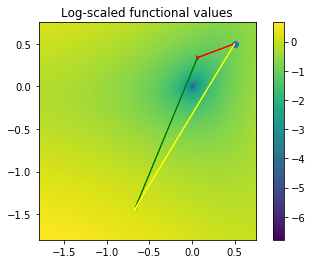

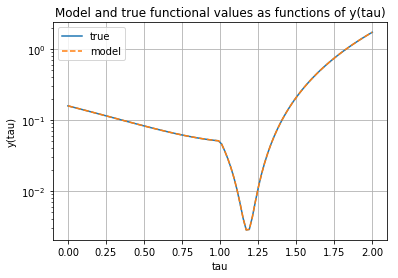

In [22]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-1.8, 0.75, 1000)
xv, yv = np.meshgrid(t, t, indexing='xy', sparse=True)

a = 0.2
f = lambda x, y: 0.5*x**2. + 0.5*y**2. - a*x*y + 1./6*x**3. - 0.5*x*y*y
df = lambda x, y: np.array([[x-a*y+1./2*x**2-0.5*y*y], [y-a*x-x*y]])
d2f = lambda x, y : np.array([[1.+x, -a-y], [-a-y, 1.-x]])

def uc(xk, yk):
    gk = df(xk, yk)
    Hk = d2f(xk, yk)
    zk = np.array([[xk], [yk]])
    return zk - np.linalg.norm(gk)**2. / np.sum(np.dot(Hk, gk)*gk) * gk

def uqn(xk, yk):
    gk = df(xk, yk)
    Hk = d2f(xk, yk)
    zk = np.array([[xk], [yk]])
    return zk - np.dot(np.linalg.inv(Hk), gk)

xk = 0.5
yk = 0.5

fv = f(xv, yv)
plt.clf()
plt.imshow(np.log10(fv), extent = [t[0], t[-1], t[0], t[-1]], origin='lower')
plt.colorbar()#format='%.0e')
plt.title('Log-scaled functional values')
uck = uc(xk, yk)
uqnk = uqn(xk, yk)

plt.axes().arrow(xk, yk, uck[0, 0]-xk, uck[1, 0]-yk, head_width=0.05, head_length=0.01, color = 'red')
plt.axes().arrow(uck[0, 0], uck[1, 0], uqnk[0, 0] - uck[0, 0], uqnk[1, 0] - uck[1, 0], head_width=0.05, head_length=0.01, color = 'green')
plt.axes().arrow(xk, yk, uqnk[0, 0] - xk, uqnk[1, 0] - yk, head_width=0.05, head_length=0.01, color = 'yellow')
plt.scatter(xk, yk)

print u"Жёлтая линия - переход в новую точку методом Ньютона"
print u"Красная линия - переход в новую точку методом наискорейшего спуска"
print u"Зелёная линия - переход в новую точку методом Ньютона после прохода точки наискорейшего спуска"
print u"Красно-зелёная ломаная - тот самый <<dogleg>>"

def dogleg(tau, xk, yk, uck, ugnk):
    assert 0 <= tau <= 2
    zk = np.array([[xk], [yk]])
    if tau < 1:
        return zk + tau*(uck - zk)
    else:
        return uck + (tau-1.)*(uqnk - uck)
    
def fd(tau):
    dglg = dogleg(tau, xk, yk, uck, uqnk)
    rv = f(dglg[0, 0], dglg[1, 0])
    return rv

def fmd(tau):
    dglg = dogleg(tau, xk, yk, uck, uqnk)
    zk = np.array([[xk], [yk]])
    gk = df(xk, yk)
    Hk = d2f(xk, yk)
    rv = f(xk, yk) + np.sum(gk*(dglg-xk)) + 0.5*np.sum(np.dot(Hk, dglg-zk)*(dglg-zk))
    return rv

tau_ls = np.linspace(0, 2, 100)
f_ls = [fd(tau) for tau in tau_ls]
fm_ls = [fd(tau) for tau in tau_ls]
plt.show()
plt.clf()
plt.semilogy(tau_ls, f_ls, label='true')
plt.semilogy(tau_ls, fm_ls, '--', label='model')
plt.xlabel('tau')
plt.ylabel('y(tau)')
plt.title(u"Model and true functional values as functions of y(tau)")
plt.grid()
plt.legend()
plt.show()

Обратите внимание: при $\tau \in [0, 1]$ в качестве направления используется градиент, при $\tau \in [1, 2]$ - векторная разность направления Ньютона и градиента. Заметим также, что на направлении-разности есть точка, расположенная к точке локального минимума ближе, чем любая точка на ньютоновском направлении.

In [206]:
# Sketch
def computeTauStar(u, v, deltaK):
    cA = np.sum(u*u)
    cB = np.sum(u*v)
    cC = np.sum(v*v) - deltaK**2.
    tauStar = (-cB + np.sqrt(cB**2. - cA*cC)) / cA
    return tauStar

def dogleg_step(gk, Hk, dk):
    yku = -np.sum(gk*gk) / np.sum(np.dot(Hk, gk)*gk) * gk
    dist1 = np.linalg.norm(yku)
    if dist1 >= dk:
        yNew = dk / dist1 * yku
        return yNew
    ykqn = -np.dot(np.linalg.inv(Hk), gk)
    dist2 = np.linalg.norm(ykqn)
    if dist2 <= dk:
        yNew = ykqn
        return yNew
    else:
        # find tauStar s.t. \|yku + tauStar*(ykqn - yku)\| = dk
        dy = ykqn-yku
        tauStar = computeTauStar(dy, yku, dk)
        yNew = yku + tauStar*dy
        return yNew

### Метод Стейхёуга (Steihaug method)

Trond Steihaug - норвежец, и согласно практической норвежско-русской транскрипции, звучит фамилия именно как Стейхёуг.
<https://scholar.google.no/citations?user=tMJ5VJAAAAAJ&hl=en>
<http://www.ii.uib.no/~trond/>

В данном методе снова рассматривается квадратичная модель $m_k(x)$, при этом $H_k$ - произвольная симметричная матрица. Идея состоит в том, чтобы строить ломаную линию, которая является кусочно-линейной аппроксимацией кривой $x(\delta)$, на основе сопряжённых градиентов. Данные векторы строятся до тех пор, пока они определены (то есть, пока $(H_k d_j, d_j) > 0$), а после, как и в методе резкого изгиба (dogleg) либо выбирается точка пересечения с границей текущего шара, либо само приближение (как лежащее внутри шара).

In [195]:
# Steihaug Conjugate Gradients (sketch)
# matlab alternative: http://www.ece.northwestern.edu/~morales/PSfiles/cg_steihaug.m


def computeTauStar(dj, zj, deltaK):
    cA = np.sum(dj*dj)
    cB = np.sum(zj*dj)
    cC = np.sum(zj*zj) - deltaK**2.
    tauStar = (-cB + np.sqrt(cB**2. - cA*cC)) / cA
    return tauStar

def scg_step(gk, Hk, deltaK, eps=1e-8):
    n = gk.size
    dj = -gk
    zj = np.zeros(n)
    for j in xrange(n):
        hdd = np.sum(np.dot(Hk, dj) * dj)
        if hdd <= 0:
            # (*) find tauStar s.t. \|zk + tauStar*dj -xk\| = deltaK 
            tauStar = computeTauStar(dj, zj, deltaK)
            return zj + tauStar*dj
        else:
            # (**) find tauj = arg min_(tau >= 0) mk(zj + tau * dj)
            tauj = - np.sum((np.dot(Hk, zj)+gk)*dj) / np.sum(np.dot(Hk, dj)*dj)
            zNew = zj + tauj * dj
            if np.linalg.norm(zNew) >= deltaK:
                # (*) find tauStar s.t. \|zk + tauStar*dj -xk\| = deltaK
                tauStar = computeTauStar(dj, zj, deltaK)
                return zj + tauStar*dj
            gNew = gk + np.dot(Hk, zNew)
            if np.linalg.norm(gNew) <= eps:
                return zNew
            else:
                dj = -gNew + np.sum(gNew*gNew) / np.sum(gk*gk) * dj
                zj = zNew.copy()
    print "Something have gone wrong"
    return

In [207]:
import numpy as np

def trust_region(x0, fun, grad, hes, funStep=dogleg_step, deltaMax=1e8, delta0=0.5, eta=0.2, eps=1e-9, maxitnum=100, verb=1):
    xk = x0.copy()
    #xnorm = np.linalg.norm(x0)
    #xk /= xnorm
    deltaK = delta0
    fk = fun(xk)
    gk = grad(xk)
    gnorm = np.linalg.norm(gk)
    Hk = hes(xk)
    fmk = lambda x: fk + np.sum(gk*(x-xk)) + 0.5*np.sum(np.dot(Hk, x-xk)*(x-xk))
    mk = fmk(xk)
    for itnum in xrange(maxitnum):
        if gnorm < eps:
            break
        p = funStep(gk, Hk, deltaK)
        #p = scg_step(gk, Hk, deltaK, eps=0.1*eps)
        rho = (fk - f(xk+p)) / (mk - fmk(xk+p))
        if rho > eta:
            xk = xk + p
            fk = fun(xk)
            gk = grad(xk)
            gnorm = np.linalg.norm(gk)
            Hk = hes(xk)
            mk = fmk(xk)
        if rho < 0.25:
            deltaK = 0.25*deltaK
        elif rho > 0.75:
            deltaK = min(2*deltaK, deltaMax)
        if verb:
            print "Itnum: %d; Rho: %.3e; gnorm: %.3e; Dk: %.3e" % (itnum+1, rho, gnorm, deltaK)
    return xk

    

In [268]:
# http://folk.uio.no/inf3330/scripting/doc/python/SciPy/tutorial/old/node14.html
def f(x):
    x2 = x**2.
    rv = np.sum(100*(x[1:] - x2[:-1])**2. + (x[:-1] - 1)**2.)
    return rv

def df(x):
    n = x.size
    rv = np.zeros(x.size)
    for i in xrange(x.size):
        if i > 0:
            rv[i] += 200*(x[i] - x[i-1]**2.)
        if i < n-1:
            rv += 2*(x[i] - 1)
            rv -= 400*x[i]*(x[i+1] - x[i]**2.)
    return rv

def d2f(x):
    n = x.size
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1], -1)
    diagonal = np.zeros(n)
    diagonal[0] = 1200*x[0]-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H
x0 = np.random.uniform(-1, 1+np.spacing(1), size=2)
print x0
x = trust_region(x0, f, df, d2f, funStep=dogleg_step, eta=1e-1, delta0=1e-2, maxitnum=1000, verb=0)
print x, f(x)
x = trust_region(x0, f, df, d2f, funStep=scg_step, eta=1e-1, delta0=1e-2, maxitnum=1000, verb=0)
print x, f(x)
tx = np.ones(2)
print tx, f(tx)

[ 0.490378    0.18127486]
[ 0.99901264  0.99802296] 9.75961644894e-07
[ 0.99901264  0.99802296] 9.75961644894e-07
[ 1.  1.] 0.0


## Методы Гаусса-Ньютона, Левенберга-Марквардта

Вернёмся к задаче нелинейных наименьших квадратов. Как показано в начале лекции, функционал этой задачи обладает матрицей Гессе, состоящей из двух различных частей:

$$H_f(z) = J_f(z) J_f^T(z) + Q(z)$$

В случае, если $\|J_f(z) J_f^T(z)\| >> \|Q(z)\|$, то вторым слагаемым можно пренебречь. Покольку в $Q(z)$ в качестве множителей входят невязки, то частным случаем подобной ситуации является малое значение нормы невязки, откуда следует, что при приближении к локальному минимуму аппроксимация матрицы Гессе улучшается. Подобный квазиньютоновский метод называют **методом Гаусса-Ньютона**.

На практике метод ведёт себя нестабильно, для него не гарантируется сходимость. Нестабильность заключается в возможных резких увеличениях значения функционала и роста нормы решения. Одним из вариантов улучшения сходимости является использование метода линейного поиска (line search) вдоль полученного направления. Trust-region расширение метода имеет отдельное название - метод Левенберга-Марквардта. 

Метод Левенберга-Марквардта относится к методам доверительного поиска (trust-region) и применяется для решения задачи нелинейных наименьших квадратов. В данном методе, как и в методе Гаусса-Ньютона, $H_k = J^T J$. Обновление параметра $\mu_k$ или $\Delta_k$ при этом может быть произведено разными методами, см. предыдущие разделы.

# Задания

1) В лекции опущены рассуждения для вывода точки Коши квадратичной модели при учёте ограничения на принадлежность шару $B_k$. Проведите эти рассуждения самостоятельно.

2) Малоранговым разложением матрицы $A$ называют представление её в виде $A = U V^T$, причём число столбцов матриц $U, V$ существенно мало (например, меньше минимума размеров матрицы $A$). Напишите реализацию вычисления разложения в смысле наименьших квадратов методом первого порядка и одним из приведённых квази-ньютоновских методов. Приведите графики зависимостей относительной невязки и значения функционала от номера итерации.

3) К условию задачи 2 добавим нелинейную зависимость: $A = f(UV^T)$, $f(z) = \tanh(z)$. Дополните реализацию необходимыми измерениями и приведите аналогичные графики сходимости.

# Список материалов

(1) http://www.numerical.rl.ac.uk/people/nimg/course/lectures/raphael/lectures/

(2) http://www.ing.unitn.it/~bertolaz/2-teaching/2011-2012/AA-2011-2012-OPTIM/lezioni/slides-TR.pdf

(3) http://www.imm.dtu.dk/pubdb/views/edoc_download.php/3215/pdf/imm3215.pdf

(4) http://www.duke.edu/~hpgavin/lm.pdf

# Дополнения

## 1. Глобальная сходимость алгоритма доверительного поиска

**Теорема.** Пусть $f \in C^2(\mathbb{R}^n, \mathbb{R})$ и пусть $m_k(y_{k+1}) \leq m_k(y_k^c)$ для всех $k$. Пусть также $\forall k$ существует положительная константа $\beta >0$, при этом $\|H_k\| < \beta$, $\| D^2 f(x_k) \| < \beta$, а также пусть $\Delta_0 \geq \frac{\varepsilon}{14 \beta}$. Тогда для итерационного процесса возможны только два случая:

(1) процесс не завершается, при этом $\lim\limits_{k \to \infty} = -\infty$, $f$ - неограничена снизу;

(2) процесс завершится за конечное время, будет построено приближение с требуемой точностью.